# Draw $t$ - $\bar{t}$ histograms

Una vez que los histogramas han sido calculados podemos dibujarlos de acuerdo a nuestras necesidades de análisis, que al ser tan diversas pueden escapar de una abstracción adecuada en un entrypoint de python. Por tanto en el presente notebook realizaremos el graficado y guardado de los histogramas que nos interesen.

In [1]:
# LIbrerías de trabajo
import ROOT
import os
import sys

Welcome to JupyROOT 6.28/04


Empezamos entonces trayendonos la configuración global del proyecto y ajustando las rutas necesarias para cargar los histogramas calculados

In [2]:
# Configuración de system paths
sys.path.append(os.path.abspath("").replace("/notebooks",""))
# cargar elementos auxiliares
from src.epp.utils import export_png_as_pdf
# Configuración de paths de trabajo
from config import OUTPUT_PATH
data_path = OUTPUT_PATH+"ttbar/"
mc_path = OUTPUT_PATH+"ttbar_mc/"
w_path = OUTPUT_PATH+"ttbar_w/"
draw_path = OUTPUT_PATH+"ttbar_data_vs_mc/"

In [3]:
# Creación de rutas adicionales
if not os.path.exists(draw_path):
    os.makedirs(draw_path)

## Exploración de resultados

Con el entorno y las rutas configuradas revisemos cuales histogramas tenemos

In [4]:
# Histogramas de datos
os.listdir(data_path)

['leptons_num.root',
 'mv1_jets.root',
 'hist',
 'jvf_jets.root',
 'mtw.root',
 'leptons_pt.root',
 'track_isol.root',
 'calor_isol.root',
 'jets_num.root',
 'met_et.root',
 'eta_jets.root',
 'b_jets_num.root',
 'eta_lepton.root',
 'jets_pt.root']

In [5]:
# HIstogramas de mc
os.listdir(mc_path)

['leptons_num.root',
 'mv1_jets.root',
 'mc_weight.root',
 'mc_weight_sf.root',
 'jvf_jets.root',
 'mtw.root',
 'cuts.root',
 'leptons_pt.root',
 'track_isol.root',
 'calor_isol.root',
 'jets_num.root',
 'met_et.root',
 'eta_jets.root',
 'b_jets_num.root',
 'eta_lepton.root',
 'jets_pt.root']

que básicamente separten en tres tipos de histogramas:

- Leptones
- Jets
- Energía perdida
 
y lo que buscamos es comparar los histogramas de los datos con los mc, para lo cual vamos a definir el lienzo de dibujo y algunos colores para las diferentes variables a revisar

In [6]:
# Crear un lienzo (canvas)
canvas = ROOT.TCanvas("Canvas", "", 1200, 800)
# green
color1 =  ROOT.gROOT.GetColor(11); color1 = ROOT.TColor.SetRGB(color1,166,212,156)
# red
color2 =  ROOT.gROOT.GetColor(12); color2 = ROOT.TColor.SetRGB(color2,207,100,100)
# blue
color3 =  ROOT.gROOT.GetColor(13); color3 = ROOT.TColor.SetRGB(color3,91,148,202)
# orange
color4 =  ROOT.gROOT.GetColor(14); color4 = ROOT.TColor.SetRGB(color4,255,139,51)

### Pintado y salvado de histogramas

* Factor de luminosidad

In [7]:
# Factor de escala por luminosidad
Ne_mc = 49761200.21
f_mc = 0.072212854
sigma = 137.29749 * 1e3
Lmc = (Ne_mc*f_mc)/sigma
Ld = 1
LWeight = Ld/Lmc
LWeight

0.03820825833559052

* Pintado y gurdado de histogramas

In [11]:
tvar = {
    "leptons_num":{"title":"Total leptons","color":17},
    "track_isol":{"title":"Isolation tracker","color":13},
    "calor_isol":{"title":"Isolation colorimeter","color":13},
    "eta_lepton":{"title":"Lepton eta","color":12},
    "leptons_pt":{"title":"Lepton pT","color":11},
    "jets_num":{"title":"Total jets","color":17},
    "b_jets_num":{"title":"Total b-jets","color":17},
    "mv1_jets":{"title":"MV1 jets","color":13},
    "jvf_jets":{"title":"JVF jets","color":13},
    "eta_jets":{"title":"Jet eta","color":12},
    "jets_pt":{"title":"Jet pT","color":11},
    "met_et":{"title":"Missing energy","color":14},
    "mtw":{"title":"W transverse mass","color":13}
}

Info in <TCanvas::Print>: png file /home/linux/Documentos/Fisica_experimental_de_particulas/experimental-particle-physics/results/ttbar_data_vs_mc/leptons_num.png has been created
Info in <TCanvas::Print>: png file /home/linux/Documentos/Fisica_experimental_de_particulas/experimental-particle-physics/results/ttbar_data_vs_mc/track_isol.png has been created
Info in <TCanvas::Print>: png file /home/linux/Documentos/Fisica_experimental_de_particulas/experimental-particle-physics/results/ttbar_data_vs_mc/calor_isol.png has been created
Info in <TCanvas::Print>: png file /home/linux/Documentos/Fisica_experimental_de_particulas/experimental-particle-physics/results/ttbar_data_vs_mc/eta_lepton.png has been created
Info in <TCanvas::Print>: png file /home/linux/Documentos/Fisica_experimental_de_particulas/experimental-particle-physics/results/ttbar_data_vs_mc/leptons_pt.png has been created
Info in <TCanvas::Print>: png file /home/linux/Documentos/Fisica_experimental_de_particulas/experimental

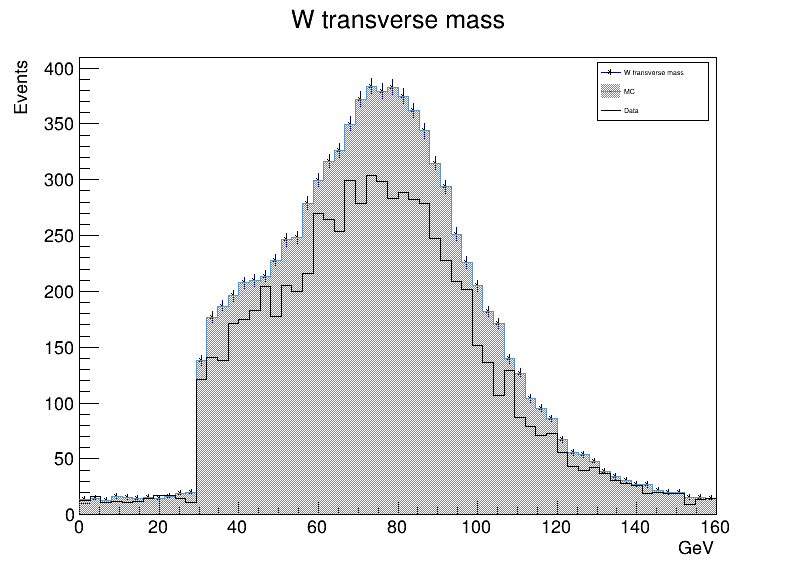

In [12]:
for key in tvar:
    # parameters
    var = key 
    data_color = 1
    mc_color = tvar[key]["color"]
    title = tvar[key]["title"]
    # Crear un lienzo (canvas)
    canvas = ROOT.TCanvas(f"Canvas_{var}", "", 800, 600)
    # lectura de histogramas de datos
    file_dt = data_path+var+".root"
    tfile_dt = ROOT.TFile(file_dt, "READ")
    hist_dt = tfile_dt.Get(var)
    # lectura de histogramas de mc
    file_mc = mc_path+var+".root"
    tfile_mc = ROOT.TFile(file_mc, "READ")
    hist_mc = tfile_mc.Get(var)
    hist_mc.Scale(LWeight)
    # histograma moc
    hist_moc = hist_mc.Clone()
    # dibujar histograma moc
    hist_moc.SetStats(0)
    hist_moc.SetTitle(title)
    hist_moc.SetMarkerStyle(3)
    hist_moc.SetMarkerSize(0.6)
    hist_moc.Draw("P")
    # dibujar histograma de mc
    hist_mc.SetLineColor(mc_color)
    hist_mc.SetFillStyle(3001)
    hist_mc.SetFillColor(mc_color)
    hist_mc.SetTitle("MC")
    hist_mc.Draw("HIST, SAME")
    # dibujar histograma de datos
    hist_dt.SetLineColor(data_color)
    hist_dt.SetLineWidth(1)
    hist_dt.SetTitle("Data")
    hist_dt.Draw("HIST,SAME")
    # Pintado y guardado
    canvas.BuildLegend(0.75, 0.79, 0.89, 0.89)
    canvas.Draw()
    canvas.SaveAs(draw_path+f"{var}.png")

* Compilado de imagenes en pdf

In [15]:
image_paths =[draw_path+x+".png" for x in tvar]  
pdf_filename = draw_path+"histograms_data_vs_mc.pdf"
export_png_as_pdf(image_paths=image_paths, pdf_filename=pdf_filename)

Se ha creado el archivo PDF: /home/linux/Documentos/Fisica_experimental_de_particulas/experimental-particle-physics/results/ttbar_data_vs_mc/histograms_data_vs_mc.pdf
